## Challenge Set 6
Topic:        Classification Error  
Date:         07/24/2016  
Name:         Adam Levin  
Worked with:  None

In [1]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18171  100 18171    0     0  30521      0 --:--:-- --:--:-- --:--:-- 41110


In [2]:
import pandas as pd

In [51]:
data = pd.read_csv('data.csv',header=None)

In [52]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?


**Challenge 1**

In [53]:
data = data.replace('n',0)
data = data.replace('y',1)

In [54]:
col_means = [data.loc[data[col]!='?',col].mean() for col in data.columns[1:]]

In [55]:
for col in data.columns[1:]:
    data[col] = data[col].replace('?',col_means[col-1])

In [56]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.362319,1.0,1.0,1.0,0.0,1.000000
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,0.0,0.812689


In [57]:
from sklearn.cross_validation import train_test_split

In [102]:
X_train,X_test,y_train,y_test = train_test_split(data.values[:,1:],data.values[:,0],test_size=.30, random_state=4444)

In [103]:
from sklearn.preprocessing import normalize
from numpy.linalg import norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [104]:
knn = KNeighborsClassifier(3,'distance',p=1) ## best k from previous challenges
lgr = LogisticRegression()
gnb = GaussianNB()
svc = SVC(probability=True)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(50)
etc = ExtraTreesClassifier(100)
clfs = [knn,lgr,gnb,svc,dtc,rfc,etc]

In [105]:
accuracies, precisions, recalls, f1_scores = [],[],[],[]
for clf in clfs:
    if clf==knn:
        lengths = norm(X_train.astype(float),axis=0)
        X_train_sp = normalize(X_train.astype(float),axis=0)
        X_test_sp = X_test/lengths
        clf.fit(X_train_sp,y_train)
        y_pred = clf.predict(X_test_sp)
    else:
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
    
    y_true = y_test
    
    num_rep_p = sum(y_pred=='republican')
    num_rep_t = sum(y_true=='republican')
    num_dem_p = len(y_true) - num_rep_p
    num_dem_t = len(y_true) - num_rep_t
    
    acc = sum(1 for i,j in zip(y_pred,y_true) if i==j) / float(len(y_true))
    
    precision_rep = sum(1 for i,j in zip(y_pred,y_true) if i==j=='republican') / float(num_rep_p)
    precision_dem = sum(1 for i,j in zip(y_pred,y_true) if i==j=='democrat') / float(num_dem_p)
    
    recall_rep = sum(1 for i,j in zip(y_pred,y_true) if i==j=='republican') / float(num_rep_t)
    recall_dem = sum(1 for i,j in zip(y_pred,y_true) if i==j=='democrat') / float(num_dem_t)
    
    f1_rep = 2 * recall_rep * precision_rep / (recall_rep + precision_rep)
    f1_dem = 2 * recall_dem * precision_dem / (recall_dem + precision_dem)
    
    accuracies.append(acc)
    precisions.append((precision_rep,precision_dem))
    recalls.append((recall_rep,recall_dem))
    f1_scores.append((f1_rep,f1_dem))

In [106]:
print '   Classifier',' ' * (30-len('Classifier')),'Accuracy','\n'
for u,clf in enumerate(clfs):
    s = str(clf).split('(')[0]
    print s,' ' * (30-len(s)),accuracies[u]

   Classifier                      Accuracy 

KNeighborsClassifier            0.931297709924
LogisticRegression              0.93893129771
GaussianNB                      0.93893129771
SVC                             0.954198473282
DecisionTreeClassifier          0.93893129771
RandomForestClassifier          0.954198473282
ExtraTreesClassifier            0.954198473282


In [107]:
print '    Classifier',' ' * (22-len('Classifier')),'Precision - Republican', ' ' * (30-len('Precision - Republican')),'Precision - Democrat','\n'
for u,clf in enumerate(clfs):
    s = str(clf).split('(')[0]
    print s,' ' * (30-len(s)),precisions[u][0],' ' * (30-len(str(precisions[u][0]))),precisions[u][1]

    Classifier              Precision - Republican          Precision - Democrat 

KNeighborsClassifier            0.941176470588                  0.925
LogisticRegression              0.96                            0.925925925926
GaussianNB                      0.979166666667                  0.915662650602
SVC                             0.961538461538                  0.949367088608
DecisionTreeClassifier          0.942307692308                  0.936708860759
RandomForestClassifier          0.961538461538                  0.949367088608
ExtraTreesClassifier            0.98                            0.938271604938


In [108]:
print '     Classifier',' ' * (22-len('Classifier')),'Recall - Republican', ' ' * (31-len('Recall - Republican')),'Recall - Democrat','\n'
for u,clf in enumerate(clfs):
    s = str(clf).split('(')[0]
    print s,' ' * (30-len(s)),recalls[u][0],' ' * (30-len(str(recalls[u][0]))),recalls[u][1]

     Classifier              Recall - Republican              Recall - Democrat 

KNeighborsClassifier            0.888888888889                  0.961038961039
LogisticRegression              0.888888888889                  0.974025974026
GaussianNB                      0.87037037037                   0.987012987013
SVC                             0.925925925926                  0.974025974026
DecisionTreeClassifier          0.907407407407                  0.961038961039
RandomForestClassifier          0.925925925926                  0.974025974026
ExtraTreesClassifier            0.907407407407                  0.987012987013


In [109]:
print '     Classifier',' ' * (22-len('Classifier')),'F1 Score - Republican', ' ' * (31-len('F1 Score - Republican')),'F1 Score - Democrat','\n'
for u,clf in enumerate(clfs):
    s = str(clf).split('(')[0]
    print s,' ' * (30-len(s)),f1_scores[u][0],' ' * (30-len(str(f1_scores[u][0]))),f1_scores[u][1]

     Classifier              F1 Score - Republican            F1 Score - Democrat 

KNeighborsClassifier            0.914285714286                  0.942675159236
LogisticRegression              0.923076923077                  0.949367088608
GaussianNB                      0.921568627451                  0.95
SVC                             0.943396226415                  0.961538461538
DecisionTreeClassifier          0.924528301887                  0.948717948718
RandomForestClassifier          0.943396226415                  0.961538461538
ExtraTreesClassifier            0.942307692308                  0.962025316456


**Challenge 2**

In [110]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
y_train = [1 if p=='republican' else 0 for p in y_train] ## converting to numbers so clfs can predict probabilities
y_test = [1 if p=='republican' else 0 for p in y_test]

In [112]:
fprs,tprs,roc_aucs = [],[],[]
for clf in clfs:
    if clf==knn:
        clf.fit(X_train_sp,y_train)
        y_pred = clf.predict_proba(X_test_sp)[:,1]
    else:
        clf.fit(X_train,y_train)
        y_pred = clf.predict_proba(X_test)[:,1]
    
    y_true = y_test
    
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    fprs.append(fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

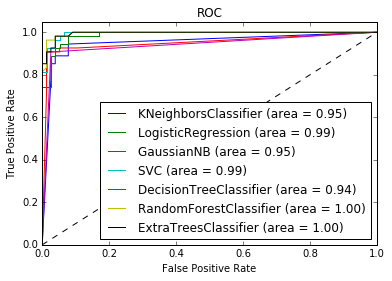

In [113]:
for u,clf in enumerate(clfs):
    s = str(clf).split('(')[0]
    plt.plot(fprs[u], tprs[u], label='%s (area = %0.2f)' % (s,roc_aucs[u]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right");

**Challenge 3**

In [114]:
from sklearn.cross_validation import cross_val_score

In [115]:
print '     Classifier',' ' * (30-len('Classifier')),'Average Precision',' ' * (27-len('Average Precision')), \
        'Average Recall',' ' * (27-len('Average Recall')),'Average F1-Score','\n'
for clf in clfs:
    s = str(clf).split('(')[0]
    if clf==knn:
        print s,' '*(36-len(s)),cross_val_score(clf,X_train_sp,y_train,scoring='precision').mean(),
        print ' '*(26-len(str(cross_val_score(clf,X_train_sp,y_train,scoring='precision').mean()))),
        print cross_val_score(clf,X_train_sp,y_train,scoring='recall').mean(),
        print ' '*(27-len(str(cross_val_score(clf,X_train_sp,y_train,scoring='recall').mean()))),
        print cross_val_score(clf,X_train_sp,y_train,scoring='f1').mean()
                
    else:
        print s,' '*(36-len(s)),cross_val_score(clf,X_train,y_train,scoring='precision').mean(),
        print ' '*(26-len(str(cross_val_score(clf,X_train,y_train,scoring='precision').mean()))),
        print cross_val_score(clf,X_train,y_train,scoring='recall').mean(),
        print ' '*(27-len(str(cross_val_score(clf,X_train,y_train,scoring='recall').mean()))),
        print cross_val_score(clf,X_train,y_train,scoring='f1').mean()

     Classifier                      Average Precision            Average Recall               Average F1-Score 

KNeighborsClassifier                  0.903328172188              0.956140350877               0.928082512893
LogisticRegression                    0.964387464387              0.947368421053               0.955541515542
GaussianNB                            0.896761133603              0.912280701754               0.904420141262
SVC                                   0.933910997005              0.973684210526               0.95314519665
DecisionTreeClassifier                0.922331947332              0.938596491228               0.929682929683
RandomForestClassifier                0.932028789924              0.973684210526               0.948930113487
ExtraTreesClassifier                  0.932456140351              0.964912280702               0.951803868646


**Challenge 4**

In [117]:
data = pd.read_csv('./../../../challenges_data/2013_movies.csv')

In [118]:
data.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00


Imputing Budget..

In [121]:
import numpy as np
from numpy.linalg import norm
from sklearn.neighbors import KNeighborsRegressor

In [122]:
mask = data.Budget.isnull().values
X_train = np.hstack((data.values[np.logical_not(mask),:][:,[5]],
                     pd.get_dummies(data.Rating).values[np.logical_not(mask),:]))
X_train[:,1] = np.ones(sum(np.logical_not(mask))) ## sidestep the issue of having 0 length vector
lengths = norm(X_train.astype(float),axis=0)
X_train = normalize(X_train.astype(float),axis=0)
y_train = data.values[np.logical_not(mask),1]
model = KNeighborsRegressor(n_neighbors=5, weights='distance', leaf_size=30, p=1, n_jobs=1)
model.fit(X_train,y_train);
X_test = np.hstack((data.values[mask,:][:,[5]],
                     pd.get_dummies(data.Rating).values[mask,:])) / lengths
data.ix[mask,'Budget'] = model.predict(X_test)

In [123]:
split = data.DomesticTotalGross.median()
X = np.hstack((data.values[:,1][:,None],pd.get_dummies(data.Rating).values,data.values[:,5][:,None])).astype(float)
y = (data.DomesticTotalGross>=split).astype(float)

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state=4444)

In [125]:
knn = KNeighborsClassifier(16,'distance',p=18) ##best k from previous challenges
lgr = LogisticRegression()
clfs = [knn,lgr]

In [126]:
precisions, recalls = [],[]
for clf in clfs:
    if clf==knn:
        X_train_sp = normalize(X_train.astype(float),axis=0)
        X_test_sp = normalize(X_test.astype(float),axis=0)
        clf.fit(X_train_sp,y_train)
        y_pred = clf.predict(X_test_sp)
    else:
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        
    y_true = y_test
    
    num_y_p = sum(y_pred)
    num_y_t = sum(y_true)
    num_n_p = len(y_true) - num_y_p
    num_n_t = len(y_true) - num_y_t
    
    precision_y = sum(1 for i,j in zip(y_pred,y_true) if i==j==1) / float(num_y_p) if float(num_y_p)!=0 else 'undef.'
    precision_n = sum(1 for i,j in zip(y_pred,y_true) if i==j==0) / float(num_n_p) if float(num_n_p)!=0 else 'undef.'
    
    recall_y = sum(1 for i,j in zip(y_pred,y_true) if i==j==1) / float(num_y_t) if float(num_y_t)!=0 else 'undef.'
    recall_n = sum(1 for i,j in zip(y_pred,y_true) if i==j==0) / float(num_n_t) if float(num_n_t)!=0 else 'undef.'
    
    precisions.append((precision_y,precision_n))
    recalls.append((recall_y,recall_n))

In [127]:
print '    Classifier',' ' * (22-len('Classifier')),'Precision - Yes', ' ' * (30-len('Precision - Yes')),'Precision - No','\n'
for u,clf in enumerate(clfs):
    s = str(clf).split('(')[0]
    print s,' ' * (30-len(s)),precisions[u][0],' ' * (30-len(str(precisions[u][0]))),precisions[u][1]

    Classifier              Precision - Yes                 Precision - No 

KNeighborsClassifier            0.521739130435                  0.571428571429
LogisticRegression              0.5                             undef.


In [128]:
print '     Classifier',' ' * (22-len('Classifier')),'Recall - Yes', ' ' * (31-len('Recall - Yes')),'Recall - No','\n'
for u,clf in enumerate(clfs):
    s = str(clf).split('(')[0]
    print s,' ' * (30-len(s)),recalls[u][0],' ' * (30-len(str(recalls[u][0]))),recalls[u][1]

     Classifier              Recall - Yes                     Recall - No 

KNeighborsClassifier            0.8                             0.266666666667
LogisticRegression              1.0                             0.0


**Challenge 5**

In [129]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3103  100  3103    0     0   9485      0 --:--:-- --:--:-- --:--:--  9547


In [130]:
data = pd.read_csv('data.csv',header=None)
data.columns = ['Age','Year','Nodes','Status']

In [131]:
data.head(2)

,Age,Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1


In [132]:
from sklearn.preprocessing import LabelBinarizer 
lb = LabelBinarizer()
X = data.values[:,[0,1,2]]
y = np.ravel(lb.fit_transform(data.values[:,3]))

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state=4444)

In [134]:
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
fpr, tpr, _ = roc_curve(y_test, lgr.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

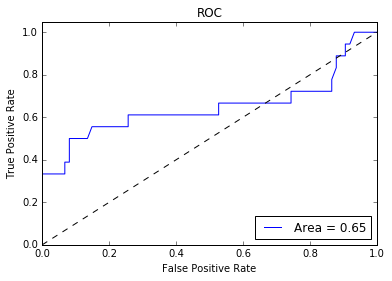

In [139]:
plt.plot(fpr, tpr, label='Area = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right");